In [1]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define ZIP file path (update with your actual path)
zip_path = "/content/drive/MyDrive/Insurance_Csv.zip"

# Define extraction folder
extract_to = "/content/Insurance_Csv"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Dataset extracted successfully to:", extract_to)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset extracted successfully to: /content/Insurance_Csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('/content/Insurance_Csv/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


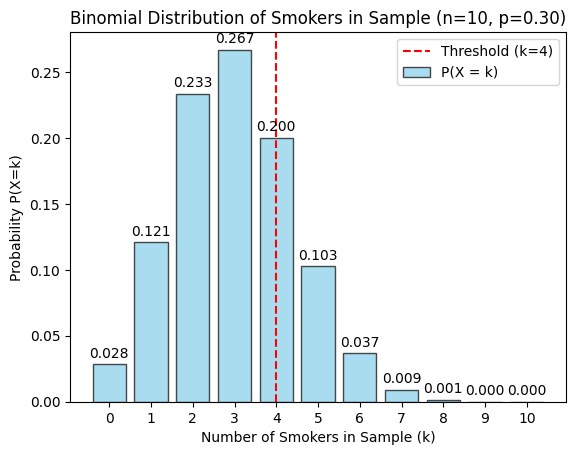

Probability that at least 4 are smokers: 0.3504
Verified using pbinom (binom.cdf equivalent): 0.3504


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given probability of being a smoker
p_smoker = 0.30  # 30%
n = 10  # Sample size
k = 4  # At least 4 smokers

# Compute probability using binomial formula: P(X >= 4) = 1 - P(X <= 3)
prob_at_least_4 = 1 - stats.binom.cdf(k-1, n, p_smoker)

# Verify using pbinom (equivalent to binom.cdf in scipy)
prob_using_cdf = 1 - stats.binom.cdf(3, n, p_smoker)

# Generate binomial distribution for plotting
x = np.arange(0, n+1)
y = stats.binom.pmf(x, n, p_smoker)

# Plot the binomial distribution
plt.bar(x, y, color='skyblue', edgecolor='black', alpha=0.7, label="P(X = k)")
plt.axvline(k, color='red', linestyle='dashed', label="Threshold (k=4)")
plt.xlabel("Number of Smokers in Sample (k)")
plt.ylabel("Probability P(X=k)")
plt.title("Binomial Distribution of Smokers in Sample (n=10, p=0.30)")
plt.xticks(x)

# Label probabilities on bars
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.005, f"{y[i]:.3f}", ha='center', fontsize=10)

plt.legend()
plt.show()

# Print computed probability
print(f"Probability that at least 4 are smokers: {prob_at_least_4:.4f}")
print(f"Verified using pbinom (binom.cdf equivalent): {prob_using_cdf:.4f}")


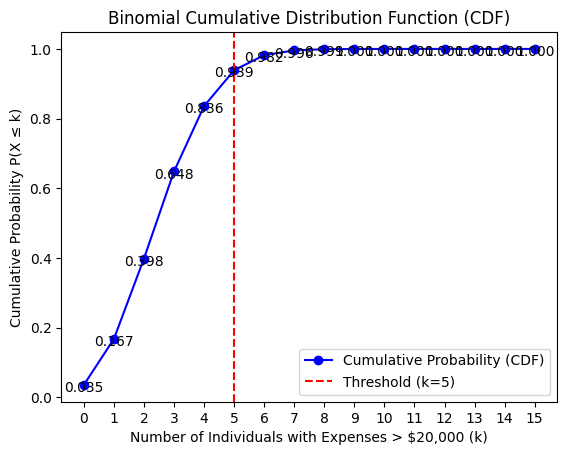

Probability that exactly 5 individuals have expenses above $20,000: 0.1032
Cumulative probability that at most 5 individuals have expenses above $20,000: 0.9389


In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given probability of high medical expenses
p_high_expenses = 0.20  # 20%
n = 15  # Sample size
k = 5  # Exactly 5 individuals

# (a) Compute probability of exactly 5 using Binomial PMF
prob_exactly_5 = stats.binom.pmf(k, n, p_high_expenses)

# (b) Compute cumulative probability of at most 5 using Binomial CDF
prob_at_most_5 = stats.binom.cdf(k, n, p_high_expenses)

# (c) Plot the cumulative distribution function (CDF)
x = np.arange(0, n + 1)
cdf_values = stats.binom.cdf(x, n, p_high_expenses)

plt.plot(x, cdf_values, marker='o', linestyle='-', color='blue', label="Cumulative Probability (CDF)")
plt.xlabel("Number of Individuals with Expenses > $20,000 (k)")
plt.ylabel("Cumulative Probability P(X ≤ k)")
plt.title("Binomial Cumulative Distribution Function (CDF)")
plt.xticks(x)

# Label cumulative probabilities
for i in range(len(x)):
    plt.text(x[i], cdf_values[i] - 0.02, f"{cdf_values[i]:.3f}", ha='center', fontsize=10)

plt.axvline(k, color='red', linestyle='dashed', label="Threshold (k=5)")
plt.legend()
plt.show()

# Print computed probabilities
print(f"Probability that exactly 5 individuals have expenses above $20,000: {prob_exactly_5:.4f}")
print(f"Cumulative probability that at most 5 individuals have expenses above $20,000: {prob_at_most_5:.4f}")


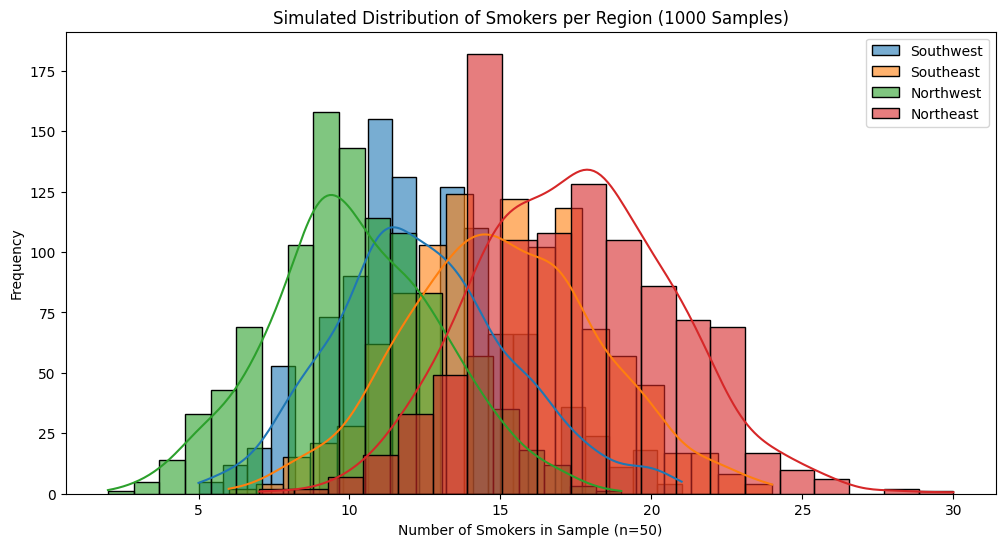

Expected vs Simulated Number of Smokers per Region (n=50):
Southwest: Expected = 12.50, Simulated Mean = 12.42
Southeast: Expected = 15.00, Simulated Mean = 15.07
Northwest: Expected = 10.00, Simulated Mean = 10.17
Northeast: Expected = 17.50, Simulated Mean = 17.45


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define probabilities for each region
regions = {
    "Southwest": 0.25,
    "Southeast": 0.30,
    "Northwest": 0.20,
    "Northeast": 0.35
}

n = 50  # Sample size per region
num_simulations = 1000  # Number of simulations

# (a) Simulate 1000 samples from a binomial distribution for each region
simulated_data = {region: np.random.binomial(n, p, num_simulations) for region, p in regions.items()}

# (b) Visualize the distribution using a bar chart
plt.figure(figsize=(12, 6))
for region, data in simulated_data.items():
    sns.histplot(data, bins=20, kde=True, label=region, alpha=0.6)

plt.xlabel("Number of Smokers in Sample (n=50)")
plt.ylabel("Frequency")
plt.title("Simulated Distribution of Smokers per Region (1000 Samples)")
plt.legend()
plt.show()

# (c) Compute expected number of smokers using E(X) = n * p
expected_values = {region: n * p for region, p in regions.items()}

# Compute the simulated mean for each region
simulated_means = {region: np.mean(data) for region, data in simulated_data.items()}

# Print expected vs simulated values
print("Expected vs Simulated Number of Smokers per Region (n=50):")
for region in regions.keys():
    print(f"{region}: Expected = {expected_values[region]:.2f}, Simulated Mean = {simulated_means[region]:.2f}")


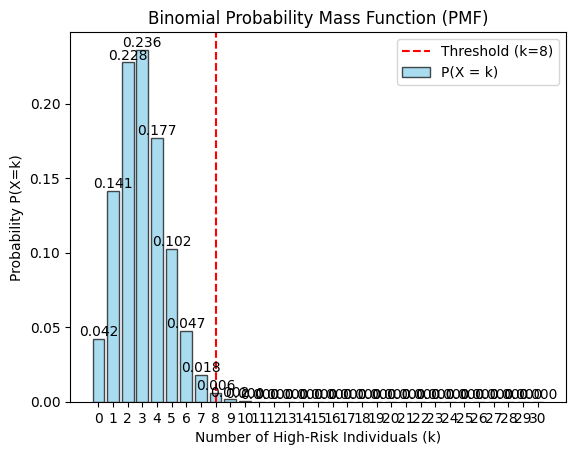

Threshold insurance charge for top 10% high-risk individuals: 5
Probability of selecting exactly 8 high-risk individuals: 0.0058


In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given probability of high medical charges (top 10% classified as high-risk)
p_high_risk = 0.10  # 10% of individuals are high-risk
n = 30  # Sample size
k = 8  # Looking for exactly 8 high-risk individuals

# (a) Find the threshold insurance charge for top 10% using quantile function (qbinom equivalent)
threshold = stats.binom.ppf(0.90, n, p_high_risk)

# (b) Compute probability of selecting exactly 8 high-risk individuals using Binomial PMF (dbinom equivalent)
prob_exactly_8 = stats.binom.pmf(k, n, p_high_risk)

# (c) Plot the Probability Mass Function (PMF)
x = np.arange(0, n + 1)
y = stats.binom.pmf(x, n, p_high_risk)

plt.bar(x, y, color='skyblue', edgecolor='black', alpha=0.7, label="P(X = k)")
plt.axvline(k, color='red', linestyle='dashed', label="Threshold (k=8)")
plt.xlabel("Number of High-Risk Individuals (k)")
plt.ylabel("Probability P(X=k)")
plt.title("Binomial Probability Mass Function (PMF)")
plt.xticks(x)

# Label PMF values on bars
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.002, f"{y[i]:.3f}", ha='center', fontsize=10)

plt.legend()
plt.show()

# Print results
print(f"Threshold insurance charge for top 10% high-risk individuals: {threshold:.0f}")
print(f"Probability of selecting exactly 8 high-risk individuals: {prob_exactly_8:.4f}")


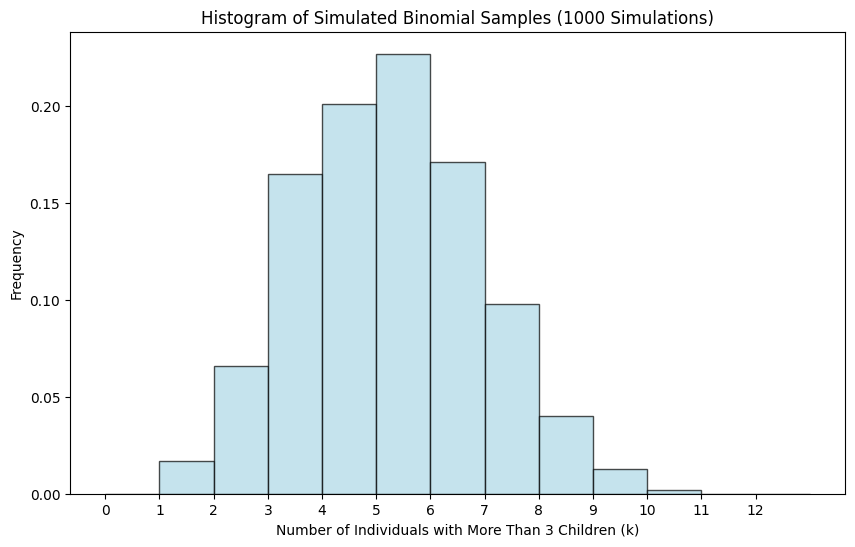

Probability of at least 5 individuals having more than 3 children (Using CDF): 0.5618
Probability of at least 5 individuals (Manual Calculation): 0.5618

Theoretical vs Simulated Mean & Variance:
Theoretical Mean: 4.80, Simulated Mean: 4.75
Theoretical Variance: 2.88, Simulated Variance: 2.85


In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Given probability of having more than 3 children
p_more_than_3 = 0.40  # 40%
n = 12  # Sample size
k = 5  # At least 5 individuals

# (a) Compute probability of at least 5 using Binomial CDF
prob_at_least_5 = 1 - stats.binom.cdf(k - 1, n, p_more_than_3)  # P(X ≥ 5) = 1 - P(X ≤ 4)

# Manual calculation using Binomial formula: P(X = k) = (nCk) * p^k * (1-p)^(n-k)
manual_prob = sum(stats.binom.pmf(i, n, p_more_than_3) for i in range(5, n + 1))

# (b) Simulate 1000 random samples from a binomial distribution
num_simulations = 1000
simulated_data = np.random.binomial(n, p_more_than_3, num_simulations)

# Plot histogram of simulated data
plt.figure(figsize=(10, 6))
plt.hist(simulated_data, bins=range(n + 2), density=True, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel("Number of Individuals with More Than 3 Children (k)")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated Binomial Samples (1000 Simulations)")
plt.xticks(range(n + 1))
plt.show()

# (c) Compute theoretical mean & variance vs simulated mean & variance
theoretical_mean = n * p_more_than_3  # E(X) = n * p
theoretical_variance = n * p_more_than_3 * (1 - p_more_than_3)  # Var(X) = n * p * (1 - p)

simulated_mean = np.mean(simulated_data)
simulated_variance = np.var(simulated_data)

# Print results
print(f"Probability of at least 5 individuals having more than 3 children (Using CDF): {prob_at_least_5:.4f}")
print(f"Probability of at least 5 individuals (Manual Calculation): {manual_prob:.4f}")
print("\nTheoretical vs Simulated Mean & Variance:")
print(f"Theoretical Mean: {theoretical_mean:.2f}, Simulated Mean: {simulated_mean:.2f}")
print(f"Theoretical Variance: {theoretical_variance:.2f}, Simulated Variance: {simulated_variance:.2f}")
